In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r'C:/Users/Arzu/Downloads/Credit_Risk.csv')

## a)EDA

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

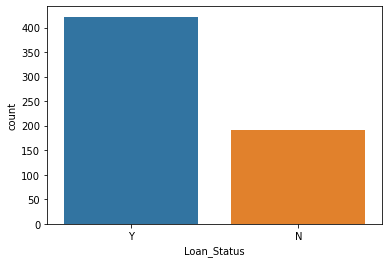

In [8]:
sns.countplot(df['Loan_Status'])

it seems the target feature is not that balanced because counts for Y and N differ 

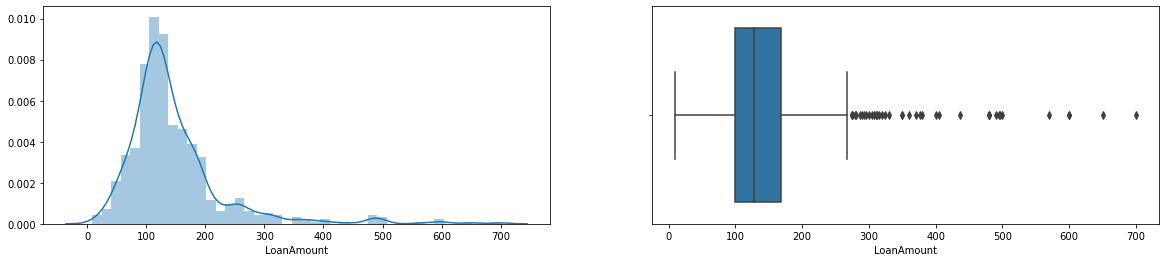

In [9]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['LoanAmount'])
f.add_subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

From the distplot, it can be seen that the density of the data lies in the range of 100-200 amounts and very rarely loan amounts are more than 300.
The boxplot shows that the data has outliers after amount of 200.

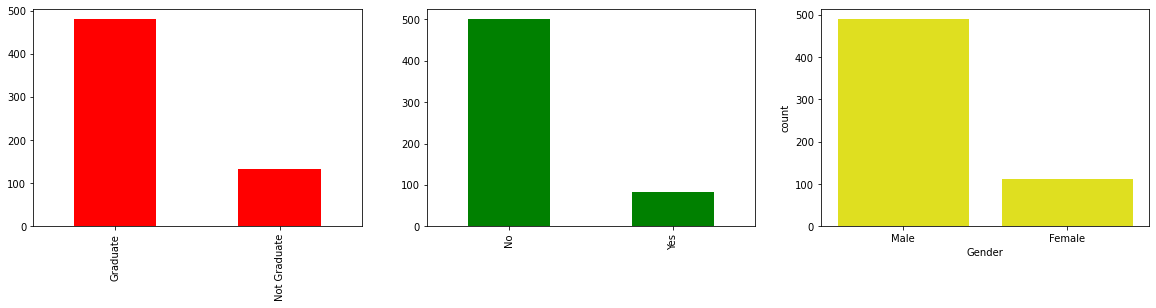

In [10]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
df['Education'].value_counts().plot(kind='bar', color='red')
f.add_subplot(1,3,2)
df['Self_Employed'].value_counts().plot(kind='bar', color='green')
f.add_subplot(1,3,3)
sns.countplot(df['Gender'], color='yellow')

Male applicant turns out to have more numbers or even 4 times the number of female loan applicants.
There are more graduated applicants than the ones not graduated.
Loan applicants are mostly the ones who are not leading their own job.

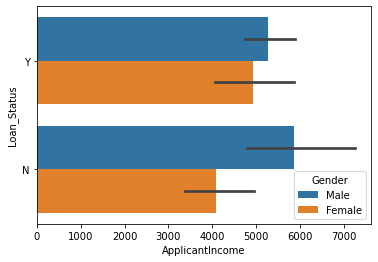

In [11]:
sns.barplot(x='ApplicantIncome',y='Loan_Status',hue='Gender',data=df)

In [ ]:
#The more income the more loan_status for 'yes'.

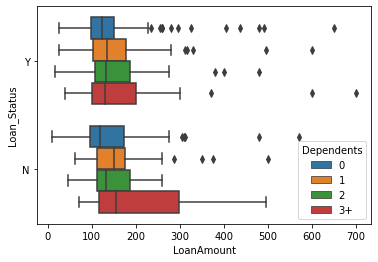

In [12]:
sns.boxplot(x='LoanAmount',y='Loan_Status',hue='Dependents',data=df)

In [ ]:
#Applicants with more dependents are more likely to have 'no' status.

In [14]:
#b)Preprocessing steps

In [6]:
#Missing value imputation
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df['LoanAmount']=imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History']=imputer.fit_transform(df[['Credit_History']])

In [7]:
#Target variable encoding
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

df[['Gender']]=df[['Gender']].astype(str)
df[['Married']]=df[['Married']].astype(str)
df[['Dependents']]=df[['Dependents']].astype(str)
df[['Education']]=df[['Education']].astype(str)
df[['Self_Employed']]=df[['Self_Employed']].astype(str)
df[['Property_Area']]=df[['Property_Area']].astype(str)
df[['Loan_Status']]=df[['Loan_Status']].astype(str)
df['Genderl']=lbe.fit_transform(df[['Gender']])
df['Marriedl']=lbe.fit_transform(df[['Married']])
df['Dependentsl']=lbe.fit_transform(df[['Dependents']])
df['Self_Employedl']=lbe.fit_transform(df[['Self_Employed']])
df['Educationl']=lbe.fit_transform(df[['Education']])
df['Loan_Statusl']=lbe.fit_transform(df[['Loan_Status']])


C:\Users\Arzu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [8]:
#outlier detection
from sklearn.ensemble import IsolationForest
iso=IsolationForest()
outlier_prediction1=iso.fit_predict(df[['Genderl']])
outlier_prediction2=iso.fit_predict(df[['Marriedl']])
outlier_prediction3=iso.fit_predict(df[['Dependentsl']])
outlier_prediction4=iso.fit_predict(df[['Self_Employedl']])
outlier_prediction6=iso.fit_predict(df[['LoanAmount']])
outlier_prediction7=iso.fit_predict(df[['Loan_Amount_Term']])
outlier_prediction8=iso.fit_predict(df[['Credit_History']])
outlier_prediction9=iso.fit_predict(df[['Educationl']])
outlier_prediction10=iso.fit_predict(df[['ApplicantIncome']])
outlier_prediction11=iso.fit_predict(df[['CoapplicantIncome']])
outlier_prediction13=iso.fit_predict(df[['Loan_Statusl']])

print((outlier_prediction1==-1).mean(),(outlier_prediction2==-1).mean(),(outlier_prediction3==-1).mean(),(outlier_prediction4==-1).mean(),(outlier_prediction6==-1).mean(),(outlier_prediction7==-1).mean(),(outlier_prediction8==-1).mean(),(outlier_prediction9==-1).mean(),(outlier_prediction10==-1).mean(),(outlier_prediction11==-1).mean(),(outlier_prediction13==-1).mean())

0.20358306188925082 0.3517915309446254 0.4381107491856677 0.18566775244299674 0.19055374592833876 0.16612377850162866 0.2263843648208469 0.2182410423452769 0.11889250814332247 0.1449511400651466 0.3127035830618892


In [21]:
#as our outliers for each column do not consist more than 50% percent more than data and as we have done some imputation before there is not that much need for removing outliers

# c)Gridsearch

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

X=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
y=df['Loan_Status']


In [12]:
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']),
    ('categorical', categorical_transformer, [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area'])
])

model=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', KNeighborsClassifier())
])

In [13]:
param_space={
    'classification__n_neighbors':range(1,42),
    'classification__leaf_size':range(1,50)
}


In [14]:
gridsearch=GridSearchCV(model,param_space,cv=5)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [28]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                   

In [29]:
accuracy_score(y_train,gridsearch.best_estimator_.predict(X_train))

0.8195652173913044

In [30]:
accuracy_score(y_test,gridsearch.best_estimator_.predict(X_test))

0.7792207792207793

In [31]:
test=gridsearch.predict(X_test)

In [32]:
gridsearch.predict(X_train)

array(['Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [33]:
y_test


299    N
36     N
505    Y
44     Y
151    Y
      ..
175    Y
409    N
181    N
300    N
144    Y
Name: Loan_Status, Length: 154, dtype: object

In [1]:
#d,e Lets report the results and visualize them

In [26]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           N       0.91      0.40      0.55        53
           Y       0.76      0.98      0.85       101

    accuracy                           0.78       154
   macro avg       0.83      0.69      0.70       154
weighted avg       0.81      0.78      0.75       154



From the classification report, it can be seen that the model has an average performance of around 78% ranging from precision, recall, f1-score, and support. Accuracy shows in value of 78%.

In [36]:
from sklearn.metrics import plot_confusion_matrix

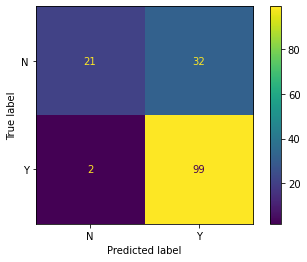

In [37]:
plot_confusion_matrix(gridsearch,X_test,y_test)

In [2]:

#21 is the number of correct predictions that an instance is negative,
#32 is the number of incorrect predictions that an instance is positive,
#2 is the number of incorrect of predictions that an instance negative, and
#99 is the number of correct predictions that an instance is positive.


In [22]:
#g)
from sklearn.tree import DecisionTreeClassifier
model=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', DecisionTreeClassifier())
])

param_space={
    'classification__max_depth':range(1,5)
}
gridsearch=GridSearchCV(model,param_space,cv=5)
X_train,X_test,y_train,y_test=train_test_split(X,y)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                   

In [30]:
accuracy_score(y_train,gridsearch.best_estimator_.predict(X_train))

0.8152173913043478

In [31]:
accuracy_score(y_test,gridsearch.best_estimator_.predict(X_test))

0.8051948051948052

In [32]:
print(classification_report(y_test,gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           N       0.83      0.43      0.57        46
           Y       0.80      0.96      0.87       108

    accuracy                           0.81       154
   macro avg       0.82      0.70      0.72       154
weighted avg       0.81      0.81      0.78       154



In [33]:
from sklearn.naive_bayes import GaussianNB
model=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', GaussianNB())
])

param_space={
    'classification__var_smoothing': np.logspace(0,-9, num=100)
}
gridsearch=GridSearchCV(model,param_space,cv=5)
X_train,X_test,y_train,y_test=train_test_split(X,y)
gridsearch.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                   

In [34]:
accuracy_score(y_train,gridsearch.best_estimator_.predict(X_train))

0.8108695652173913

In [35]:
accuracy_score(y_test,gridsearch.best_estimator_.predict(X_test))

0.8116883116883117

In [36]:
print(classification_report(y_test,gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           N       0.84      0.52      0.64        50
           Y       0.80      0.95      0.87       104

    accuracy                           0.81       154
   macro avg       0.82      0.74      0.76       154
weighted avg       0.82      0.81      0.80       154



In [37]:
from sklearn.linear_model import LogisticRegression
model=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', LogisticRegression())
])
param_space={
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
gridsearch=GridSearchCV(model,param_space,cv=5)
X_train,X_test,y_train,y_test=train_test_split(X,y)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                   

In [38]:
accuracy_score(y_train,gridsearch.best_estimator_.predict(X_train))

0.808695652173913

In [39]:
accuracy_score(y_test,gridsearch.best_estimator_.predict(X_test))

0.8246753246753247

In [40]:
print(classification_report(y_test,gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           N       0.93      0.50      0.65        50
           Y       0.80      0.98      0.88       104

    accuracy                           0.82       154
   macro avg       0.86      0.74      0.77       154
weighted avg       0.84      0.82      0.81       154

